# 2019 Trendmicro CTF: Wild 100 

In [1]:
! cat prompt.txt

Category: Wildcard
Points: 100
You have been given a dataset which contains images of digits 3 and 6.
The dataset contains a total of 34022 images (16768 files being images of digit 3, and the rest being images of digit 6).
The dataset somehow got randomly mixed, and also contains some duplicate images of each digit.
Your task is to find the number of unique images of each digit in the dataset.

The steps of the challenge are:

1. Since the images are randomly mixed, we need a way to separate the images of digits 3 and 6 from each other. You can use a clustering algorithm for this purpose.

2. Figure out which digit belongs to which cluster.

3. Count the number of unique images in each cluster, and form the flag.

(Note if x is the number of unique images of digit 3, and y is the number of unique images of digit 6, then the flag will be TMCTF{x_y})

Download the file
Extract the downloaded file by using the following password.
Optional: Check integrity of 7z file by comparing file SHA

In [14]:
! 7z x files21.7z -pbfF0zdtn4CpcQq1VFqUL -y > /dev/null
! unzip -q data.zip 
! ls

data           data.zip       files21.7z     prompt.txt     solution.ipynb


# Solution

This problem is fairly straightforward. Since we already know that there should be two main classes then K-means clustering with K=2 is the first method we try. 

# Load Data

In [16]:
import glob
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [21]:
filelist = glob.glob('data/*.jpg')

In [22]:
X = np.array([np.array(Image.open(fname).convert('L')).reshape(28*28) for fname in filelist])
X.shape

(34022, 784)

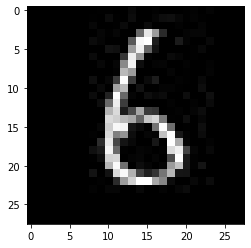

In [25]:
plt.imshow(X[0].reshape(28, 28), cmap="gray")
plt.show()

# Cluster

Numbers in each cluster matches the expected counts in the prompt.

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)
pd.Series(kmeans.labels_).value_counts()

1    17254
0    16768
dtype: int64

To get the unique we just hash the bytes.

In [37]:
counts = [set(), set()]
for idx, label in enumerate(kmeans.labels_):
    counts[label].add(X[idx].tostring())

In [38]:
len(counts[0])

347

In [39]:
len(counts[1])

14962

__FLAG:__ TMCTF{14962_347}